# (C) Copyright 1996- ECMWF.
#
# This software is licensed under the terms of the Apache Licence Version 2.0
# which can be obtained at http://www.apache.org/licenses/LICENSE-2.0.
# In applying this licence, ECMWF does not waive the privileges and immunities
# granted to it by virtue of its status as an intergovernmental organisation
# nor does it submit to any jurisdiction.

In this Notebook we present example code that you can use together with our library thermofeel

In [3]:
#These are all the libraries you will need to use this notebook
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import thermofeel as tf
import metview as mv
import cfgrib
import eccodes
import Magics as magics
from Magics import macro as magics

In [4]:
#Reading in a grib file that was created using a version of compute_utci.py
# You could change this grib file to any that contains relative humidity, apparent temperature, heat index and utci.
# the grid parameter interpolates the grid here we are using 0.1,0.1 ERA5 uses 0.25,0.25
#step allows you to select a step in time, leaving this parameter blank will select all steps in the grib file
gribf = "Nov19thoutputr.grib"
data_regular = mv.read(source=gribf,grid=[0.1,0.1],step=12)
#This converts our metview object to a xarray dataset
ds = data_regular.to_dataset()
print(ds)
#here we select certain variables from our dataset
rhpn = ds['r2'][:]
aptmpn = ds['aptmp'][:]
hdn = ds['heatx'][:]
utcin = ds['utci'][:]

Exception: Metview error: READ-> Unable to open file: Nov19thoutputr.grib

In [3]:
#This step makes sure that our variables have the right short names
rhpn = rhpn.rename("r2")
rhpnds = rhpn.to_dataset()


aptmpn = aptmpn.rename("aptmp")
aptmpnds = aptmpn.to_dataset()


hdn = hdn.rename("heatx")
hdnds = hdn.to_dataset()


utcin = utcin.rename("utci")
utcinds = utcin.to_dataset()


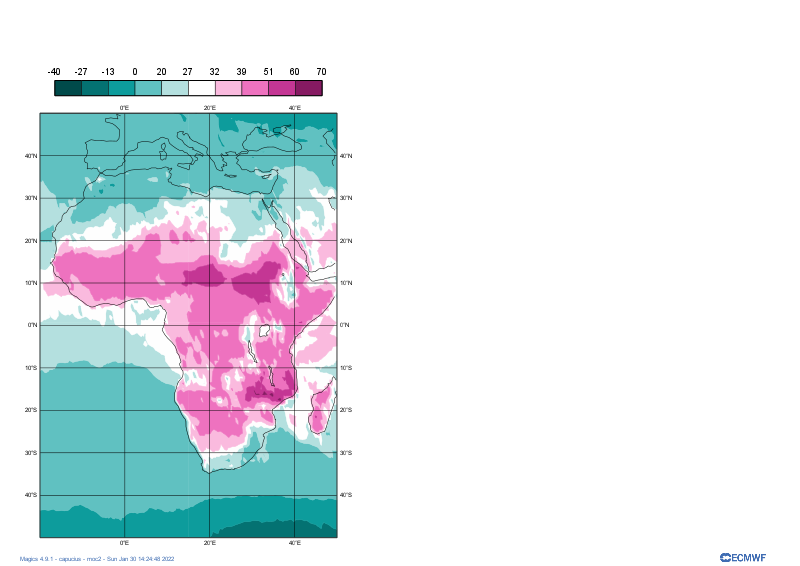

In [4]:
#This is a simple magics plot example more detailed examples can be found: 
# https://github.com/ecmwf/notebook-examples
#Select one of the datasets for a variable here we are using apparent temperature for step 12

data_grib = magics.mxarray(xarray_dataset = aptmpnds,
xarray_variable_name = "aptmp")

#area can be used to crop to any region of the world, not using this parameter returns the full area plot
#here we are plotting for the African Continent
area = magics.mmap(subpage_map_projection="cylindrical",
                    subpage_lower_left_longitude=-20.,
        subpage_lower_left_latitude=-50,
        subpage_upper_right_longitude=50,
        subpage_upper_right_latitude=50,
    )    

coastlines = magics.mcoast()

#This sets how you cut up the colour palette
levels = [-40.,-27,-13,0,20,27,32,39,51,60,70]

contour = magics.mcont(
    legend= "on",
    contour ="off",
    contour_label="off",
    contour_level_selection_type = "level_list",
    contour_level_list = levels,
    contour_shade = 'on',
    contour_shade_method = 'area_fill',
    contour_shade_colour_method = 'palette',
    contour_shade_palette_name  = "m_green_purple_11")

legend = magics.mlegend(legend_display_type = "continuous",
                        legend_text_font_size = 0.4,
                        legend_text_colour = '#000000')

magics.plot(area,data_grib,contour,coastlines,legend)



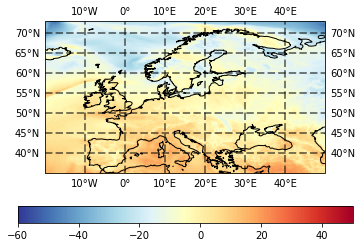

In [5]:
#This is a simple cartopy plot example

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.set_extent([-20,50,35,70]) # this is cropping the plot to Europe

# vmin and vmax limit the colour bar extent
filled_c=plt.pcolormesh(utcinds.longitude,utcinds.latitude,utcinds.utci-273.15,
                        transform=ccrs.PlateCarree(),cmap="RdYlBu_r",vmin=-60,vmax=50)

fig.colorbar(filled_c, orientation='horizontal')

In [8]:
#Create a dataframe from your dataset for the area average of the globe
#reading in the same grib as above, but not limiting for one time step
gribf = "Nov19thoutputr.grib"
data_regular = mv.read(source=gribf,grid=[0.1,0.1])

#This converts our metview object to a xarray dataset
dataset = data_regular.to_dataset()
print(dataset)

#meaning across the area of the globe
dataset = dataset.mean(axis=1).mean(axis=1)


#This converts out xarray dataset to a pandas dataframe
df = dataset.to_dataframe()
print(df.head())


<xarray.Dataset>
Dimensions:            (latitude: 1801, longitude: 3600, step: 4)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 0 days 12:00:00 ... 9 days 18:0...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * longitude          (longitude) float64 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
    valid_time         (step) datetime64[ns] ...
Data variables:
    t2m                (step, latitude, longitude) float32 ...
    r2                 (step, latitude, longitude) float32 ...
    aptmp              (step, latitude, longitude) float32 ...
    heatx              (step, latitude, longitude) float32 ...
    uvcossza           (step, latitude, longitude) float32 ...
    utci               (step, latitude, longitude) float32 ...
    mrt                (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
   

array([[<AxesSubplot:xlabel='t2m', ylabel='t2m'>,
        <AxesSubplot:xlabel='r2', ylabel='t2m'>,
        <AxesSubplot:xlabel='aptmp', ylabel='t2m'>,
        <AxesSubplot:xlabel='heatx', ylabel='t2m'>,
        <AxesSubplot:xlabel='utci', ylabel='t2m'>],
       [<AxesSubplot:xlabel='t2m', ylabel='r2'>,
        <AxesSubplot:xlabel='r2', ylabel='r2'>,
        <AxesSubplot:xlabel='aptmp', ylabel='r2'>,
        <AxesSubplot:xlabel='heatx', ylabel='r2'>,
        <AxesSubplot:xlabel='utci', ylabel='r2'>],
       [<AxesSubplot:xlabel='t2m', ylabel='aptmp'>,
        <AxesSubplot:xlabel='r2', ylabel='aptmp'>,
        <AxesSubplot:xlabel='aptmp', ylabel='aptmp'>,
        <AxesSubplot:xlabel='heatx', ylabel='aptmp'>,
        <AxesSubplot:xlabel='utci', ylabel='aptmp'>],
       [<AxesSubplot:xlabel='t2m', ylabel='heatx'>,
        <AxesSubplot:xlabel='r2', ylabel='heatx'>,
        <AxesSubplot:xlabel='aptmp', ylabel='heatx'>,
        <AxesSubplot:xlabel='heatx', ylabel='heatx'>,
        <AxesSubplo

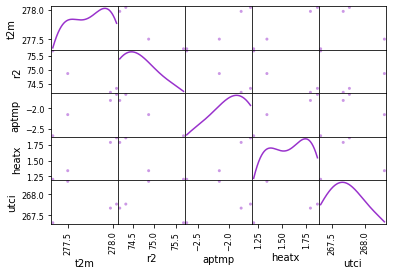

In [9]:
#Making a Scatter Matrix of our dataframe

#This line plots a scatter matrix, with a density curve in the middle in a dark orchid colour
pd.plotting.scatter_matrix(df[['t2m','r2','aptmp','heatx','utci']],color='darkorchid',diagonal='kde',density_kwds={'color':'darkorchid'})

#use the below line to save out a figure
#plt.savefig("ScatterMatrix.png",dpi=300)

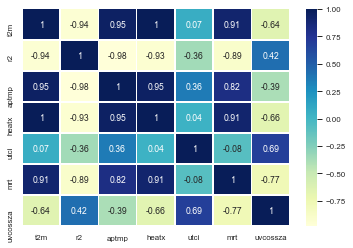

In [11]:
#Using the seaborn library to plot a correlation heatmap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=0.9) 
sns_plot=sns.heatmap(df[['t2m','r2','aptmp','heatx','utci','mrt','uvcossza']].corr().round(decimals=2),annot=True,cmap="YlGnBu",linewidth=.5)
#Use the belowlines to save out the figure
#fig = sns_plot.get_figure()
#fig.savefig("corrmatrix.png",dpi=1000,bbox_inches="tight")